# Intialize

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time


# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf)
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66,
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,
 
}




common_params = {

'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
    

# 'delta for galaxies' : "200c",
# 'delta for matter density' : "200c",
# 'delta for electron density':"200c",    

'mass function' : 'T08M200c',
'concentration parameter' : 'B13',

'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0005,
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0005,


'ell_max': 1600.0,
'ell_min': 2.0,
'dell': 10,

'non_linear' : 'hmcode',

'hm_consistency' : 0,

}

def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

In [3]:
data = np.loadtxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/notebooks/lsst_Y10gold_5bin.nz')
z = data[:,0]
dndz = data[:,1:]

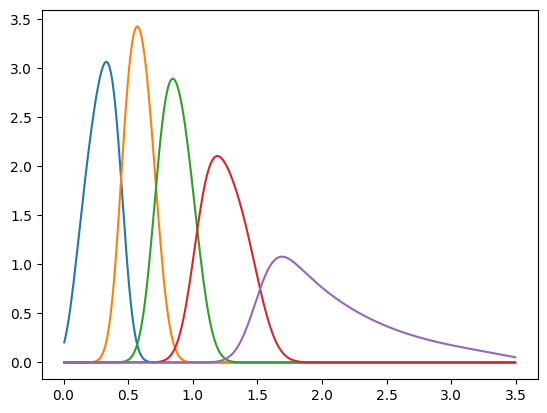

In [4]:
plt.plot(z,dndz[:,0])
plt.plot(z,dndz[:,1])
plt.plot(z,dndz[:,2])
plt.plot(z,dndz[:,3])
plt.plot(z,dndz[:,4])


In [5]:
for i in range(5):
    np.savetxt('/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/notebooks/lsst_Y10gold_bin'+str(i+1)+'.txt',
               np.c_[z,dndz[:,i]])

# compute class_sz

In [6]:
%%time

M = Class()

M.set(common_params)
M.set(cosmo_params)
M.set({

'output': 'gallens_gallens_1h,gallens_gallens_2h',

'pressure profile':'B12',

"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'M_min' : 1.0e14, 
'M_max' : 5e15,
    

    
    
'hm_consistency' : 0,
    
    
    
# 'ndim_masses' : 500,
'ndim_redshifts' :100,
    
'full_path_to_source_dndz_gal':'/Users/boris/Work/CLASS-SZ/SO-SZ/class_sz/notebooks/lsst_Y10gold_bin1.txt'

})
M.compute_class_szfast()

CPU times: user 768 ms, sys: 174 ms, total: 942 ms
Wall time: 436 ms


In [10]:
%%time
cl_kgkg_1h_all = []
cl_kgkg_2h_all = []
marr = np.geomspace(1e10,1e15,5)
for mp in marr:
    class_sz_params_to_update={
        'M_min' : mp
    }
    M.compute_class_sz(class_sz_params_to_update)

    l = np.asarray(M.cl_kg_kg()['ell'])
    cl_kgkg_1h = np.asarray(M.cl_kg_kg()['1h'])
    cl_kgkg_2h = np.asarray(M.cl_kg_kg()['2h'])
    cl_kgkg_1h_all.append(cl_kgkg_1h)
    cl_kgkg_2h_all.append(cl_kgkg_2h)

CPU times: user 2.18 s, sys: 7.6 ms, total: 2.19 s
Wall time: 383 ms


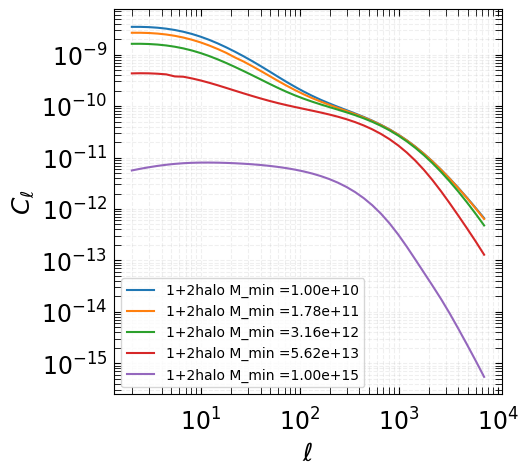

In [13]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$C_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylim(1e-1,1e4)
# ax.set_xlim(5e-2,1e1)
for imp,mp in enumerate(marr):
    cl_kgkg_1h = cl_kgkg_1h_all[imp]
    cl_kgkg_2h = cl_kgkg_2h_all[imp]
    # ax.plot(l,cl_kgkg_1h/l_to_dl(l))
    # ax.plot(l,cl_kgkg_2h/l_to_dl(l))
    ax.plot(l,cl_kgkg_2h/l_to_dl(l)+cl_kgkg_1h/l_to_dl(l),label='1+2halo M_min =%.2e'%mp)
# # plt.xlim(2e-2,4e1)
# plt.ylim(1e-2,1e4)
ax.legend()